In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

#0~1로 바꿔준다. 또한, 입력 이미지에  깊이(채널) 차원을 작성해준다. 
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
print(train_input.shape)
print(test_input.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
print(train_scaled.shape)

(48000, 28, 28, 1)


In [5]:
model = keras.Sequential()

In [6]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(28,28,1)))

In [7]:
model.add(keras.layers.MaxPooling2D(2))

In [8]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [9]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

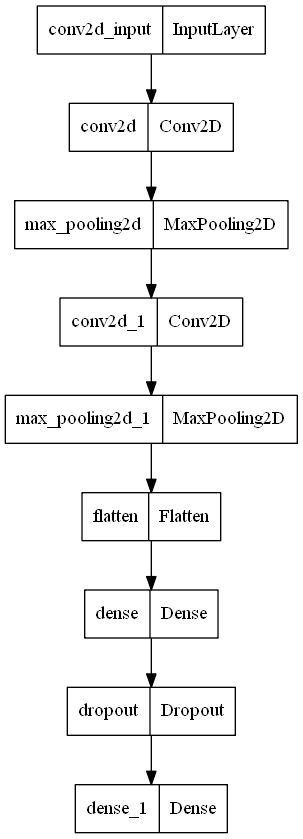

In [11]:
keras.utils.plot_model(model)

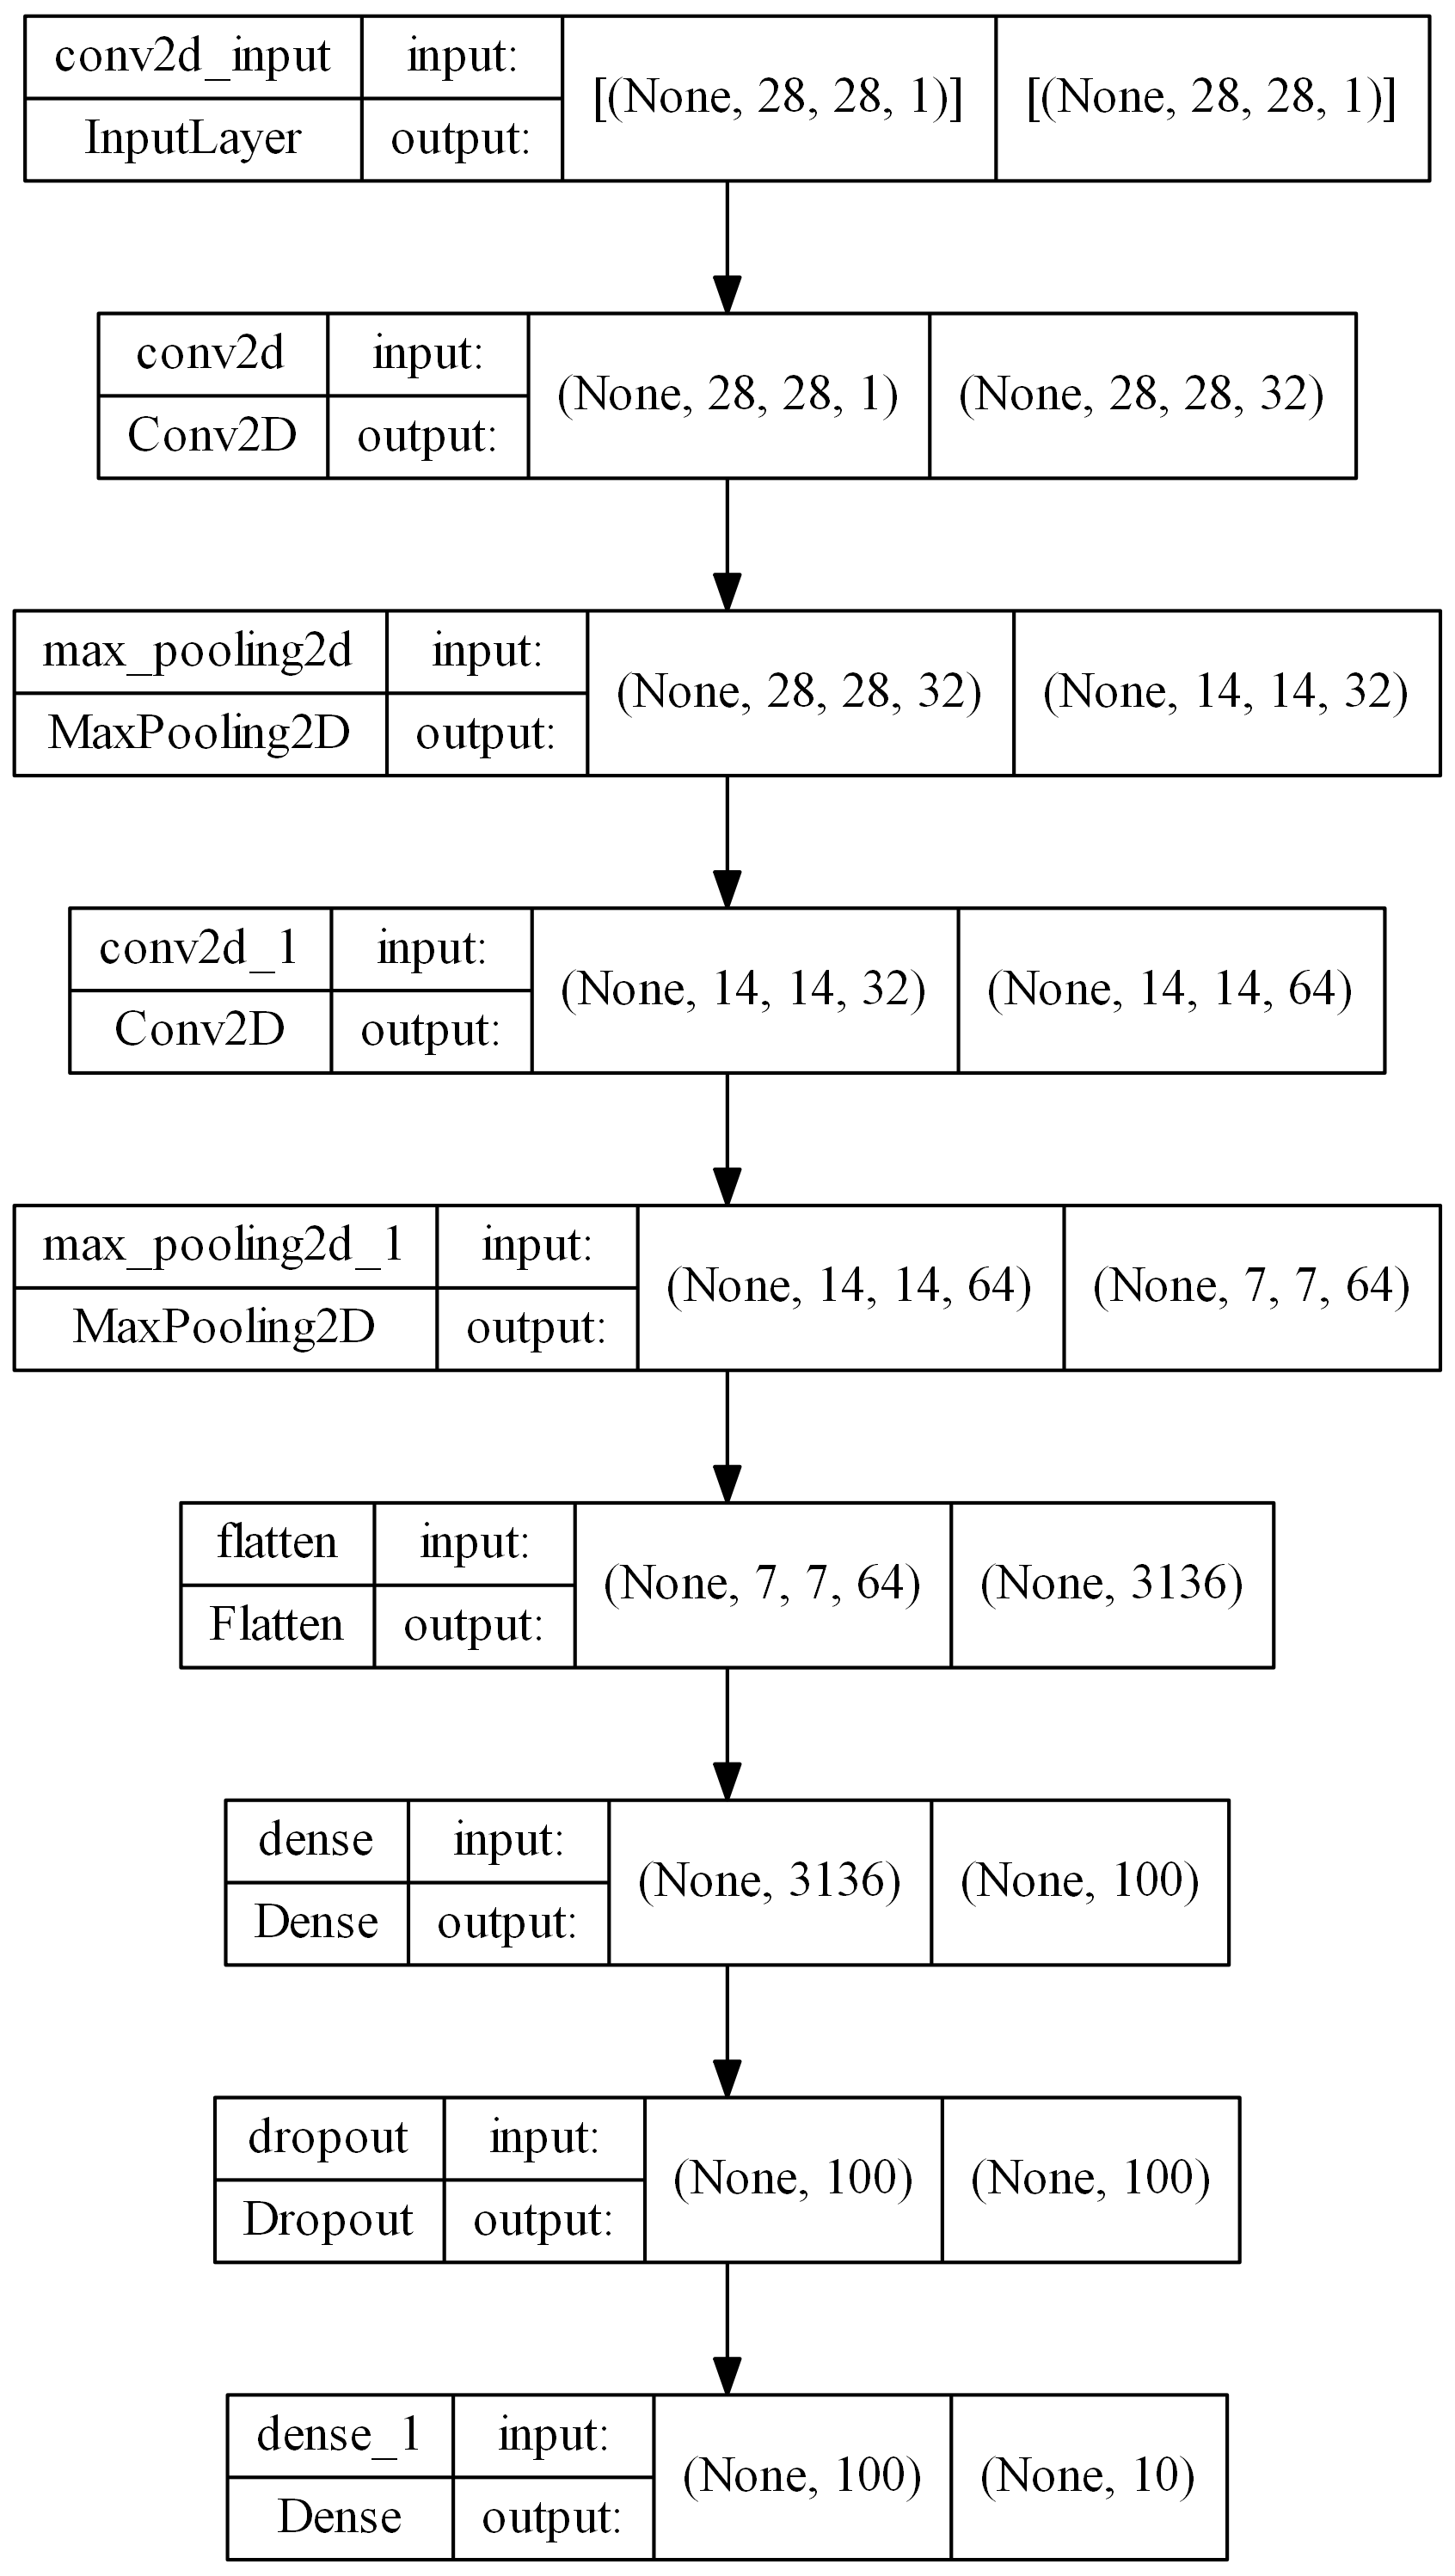

In [12]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.5372 - accuracy: 0.8080 - val_loss: 0.3376 - val_accuracy: 0.8754
Epoch 2/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3534 - accuracy: 0.8739 - val_loss: 0.2754 - val_accuracy: 0.8967
Epoch 3/20
1500/1500 [==============================] - 13s 8ms/step - loss: 0.3016 - accuracy: 0.8914 - val_loss: 0.2632 - val_accuracy: 0.9021
Epoch 4/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2696 - accuracy: 0.9039 - val_loss: 0.2382 - val_accuracy: 0.9103
Epoch 5/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2435 - accuracy: 0.9101 - val_loss: 0.2495 - val_accuracy: 0.9080
Epoch 6/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2274 - accuracy: 0.9174 - val_loss: 0.2186 - val_accuracy: 0.9212
Epoch 7/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2077 - accuracy: 0.9231 - val_loss: 0.2218 - val_ac

In [14]:
import matplotlib.pyplot as plt

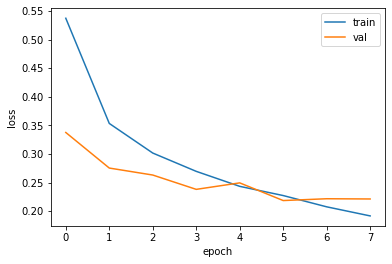

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [16]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2186 - accuracy: 0.9212


[0.2186337411403656, 0.9212499856948853]

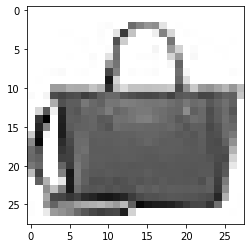

In [17]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [18]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[6.6648721e-11 2.1553349e-19 5.2476719e-13 6.1877010e-14 2.1773422e-11
  6.6873946e-12 1.6489282e-12 9.5825761e-12 1.0000000e+00 1.7635806e-12]]


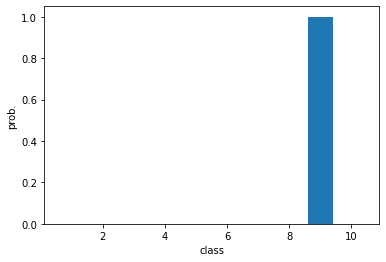

In [19]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [20]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [21]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [22]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [23]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2430 - accuracy: 0.9152


[0.24302352964878082, 0.9151999950408936]